### Download, process, and upload training data

In [5]:
from datetime import datetime as dt


S2_BANDS = ['SCL', 'B02', 'B03', 'B04', 'B08']

BBOXES = {
    'south':  [29.296298, -1.582263, 29.769293, -1.197520],
    'central': [29.242740, -0.807347, 29.629208, -0.591585],
    'testing': [29.479746, -0.724323, 29.624479, -0.559775]
}

DATES = [
    (dt(2020, 1, 1),  dt(2020, 3, 1),  10),
    (dt(2020, 4, 1),  dt(2020, 6, 1),  10),
    (dt(2020, 7, 1),  dt(2020, 9, 1),  10),
    (dt(2020, 10, 1), dt(2020, 12, 1), 10),

    (dt(2021, 1, 1),  dt(2021, 3, 1),  10),
    (dt(2021, 4, 1),  dt(2021, 6, 1),  10),
    (dt(2021, 7, 1),  dt(2021, 9, 1),  10),
    (dt(2021, 10, 1), dt(2021, 12, 1), 10),

    (dt(2022, 1, 1),  dt(2022, 3, 1),  10),
    (dt(2022, 4, 1),  dt(2022, 6, 1),  10),
    (dt(2022, 7, 1),  dt(2022, 9, 1),  10),
    (dt(2022, 10, 1), dt(2022, 12, 1), 10),
]

In [7]:
%run _downloads.ipynb

bbox = BBOXES['testing']
collection = get_collection(DATES[0][0], DATES[0][1], bbox, './data/testing/s2_collection.json', max_cloud_cover=20)

./data/testing/s2_collection.json: 2 items found
./data/testing/s2_collection.json: 2 filtered items


In [8]:
composites = get_processed_composites(collection, bbox, './data/testing', overwrite=False)

	S2B_35MQV_20200207_0_L2A
	S2A_35MQV_20200123_0_L2A
{'S2B_35MQV_20200207_0_L2A': {'B02': './data/testing/S2B_35MQV_20200207_0_L2A/B02_masked.tif', 'B03': './data/testing/S2B_35MQV_20200207_0_L2A/B03_masked.tif', 'B04': './data/testing/S2B_35MQV_20200207_0_L2A/B04_masked.tif', 'B08': './data/testing/S2B_35MQV_20200207_0_L2A/B08_masked.tif'}, 'S2A_35MQV_20200123_0_L2A': {'B02': './data/testing/S2A_35MQV_20200123_0_L2A/B02_masked.tif', 'B03': './data/testing/S2A_35MQV_20200123_0_L2A/B03_masked.tif', 'B04': './data/testing/S2A_35MQV_20200123_0_L2A/B04_masked.tif', 'B08': './data/testing/S2A_35MQV_20200123_0_L2A/B08_masked.tif'}}


In [14]:
%run _imagery.ipynb

rgb_band_paths = [composites['B04'], composites['B03'], composites['B02']]

rgb_uint16_vrt_path = './data/testing/rgb_uint16.vrt'
create_vrt(rgb_band_paths, rgb_uint16_vrt_path)

rgb_byte_vrt_path = './data/testing/rgb_byte.vrt'
create_byte_vrt(rgb_uint16_vrt_path, rgb_byte_vrt_path)

rgb_byte_tif_path = './data/testing/rgb_byte_cog.tif'
create_tif(rgb_byte_vrt_path, rgb_byte_tif_path, isCog=True)

In [15]:
%run _imagery.ipynb

all_band_paths = [composites[band] for band in composites]

all_uint16_vrt_path = './data/testing/all_uint16.vrt'
create_vrt(all_band_paths, all_uint16_vrt_path)

all_uint16_tif_path = './data/testing/all_uint16.tif'
create_tif(all_uint16_vrt_path, all_uint16_tif_path, isCog=False)

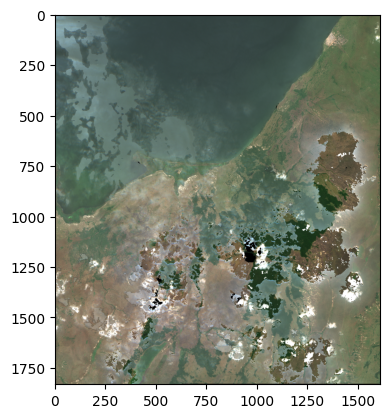

<AxesSubplot: >

In [16]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

tif_path = "./data/testing/rgb_byte_cog.tif"

src = rasterio.open(tif_path)
show(src.read())

In [ ]:
# TODO: upload rgb_byte_cog.tif to Labelbox
# TODO: save all_uint16.tif for training